# The sparks foundation
## Intern: Data science and business analytics

## Name : Ankit Yadav

## Task 6: Prediction using Decision tree algorithm

### Queries :

* Create a decision tree and visualize it graphically
* If we feed any new data it should be able to predict the class accordingly

## Dataset : https://bit.ly/3kXTdox

### Implementation of Decision Tree Algorithm using Sklearn

In [1]:
#library used for data manipulation and analysis
import pandas as pd
# library used for working with arrays.
import numpy as np
# library for plots and visualisations
import matplotlib.pyplot as plt
# library for visualisations
import seaborn as sns
%matplotlib inline 
# to restrict the float value to 2 decimal places
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [4]:
# Loading the data from the dataset

df = pd.read_csv("Iris.csv")

### Attribute Information

* Id - Unique Id number to each observation
* SepalLengthCm - Length of the sepal of flower in cm
* SepalWidthCm - Width of the sepal of flower in cm
* PetalLengthCm - Length of the Petal of flower in cm
* PetalWidthCm - Width of the Petal of flower in cm
* Species - Species of the Flower

In [5]:
# Top 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Last 5 rows
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# Shape of the Dataset

df.shape

(150, 6)

* we have 150 rows and 6 columns in the dataset

In [8]:
# Checking about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* Data types of the Id - int
* SepalLengthCm - float
* SepalWidthCm - float
* PetalLengthCm - float
* PetalWidthCm - float
* Species - object

In [9]:
# Checking for null values in the column

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values present in any column.

In [11]:
# Checking for the duplicate rows

value = len(df[df.duplicated()])
print(value)

0


* There are no duplicate values present in the dataset.

In [13]:
# Data description 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


### Outlier Treatment

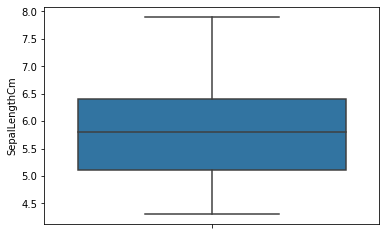

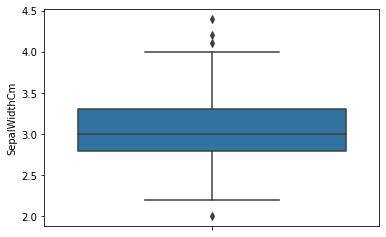

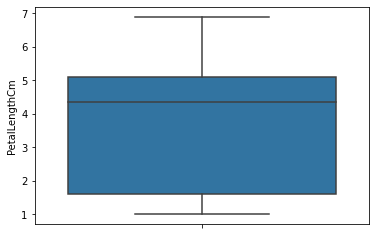

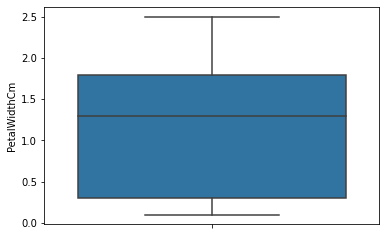

In [19]:
cols=df.select_dtypes(include = "float64")
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

* By looking at the visualisation we can say that Sepal width cm has outliers. 

In [23]:
# Outlier removal

q1 = df["SepalWidthCm"].quantile(0.25)
q3 = df["SepalWidthCm"].quantile(0.75)

iqr = q3 - q1

df = df[(df["SepalWidthCm"] >= q1 - 1.5*iqr) & (df["SepalWidthCm"] <= q3 + 1.5*iqr ) ]

df.shape

(146, 6)

By performing outlier detection 4 rows are lost.

In [22]:
df["SepalWidthCm"].describe()

count    146.000000
mean       3.036986
std        0.395145
min        2.200000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.000000
Name: SepalWidthCm, dtype: float64

We have succesfully removed outliers.

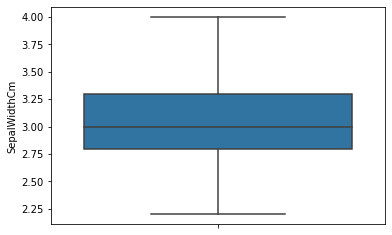

In [25]:
#Boxplot for sepal width (cm) after outlier treatment

sns.boxplot(y = df["SepalWidthCm"])
plt.show()

Now its looking neat.

In [28]:
# Dropping columns which are not important

df.drop(columns=["Id","Species"],inplace = True)

In [29]:
from sklearn.preprocessing import StandardScaler

# Standard scaling to avoid bias.

standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df)

## Finding the optimal no. of clusters

In [31]:
from sklearn.cluster import KMeans

cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    ntroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]
    

,num_cluster,cluster_errors
0,1,584.000000
1,2,218.934500
2,3,135.398152
3,4,110.780721
4,5,89.372108
5,6,79.121842
6,7,68.321940
7,8,59.379410
8,9,52.460776
9,10,46.183451


## Plotting elbow curve to visualize number of clusters

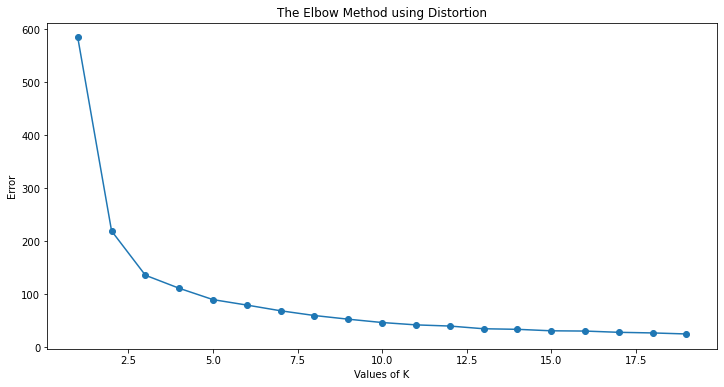

In [32]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show()

From the above elbow curve we can say that '3' is the optimal number of cluster

## Creating object of the model and fitting it

In [33]:
model = KMeans(n_clusters=3, max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=3)

## Analysis of clusters found

In [34]:
df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

In [35]:
df2=pd.concat([pd.Series([0,1,2]), km_clusters_Slength,km_clusters_Swidth,km_clusters_Plength,km_clusters_Pwidth],axis=1)
df2

,0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.916393,2.760656,4.408197,1.440984
1,1,4.976596,3.365957,1.463830,0.244681
2,2,6.850000,3.073684,5.742105,2.071053


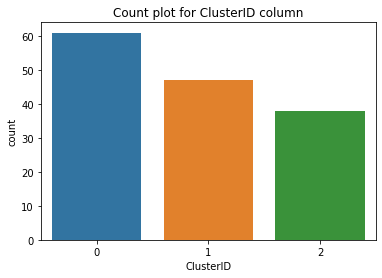

In [36]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

## Scatter plot to visualize the clusters

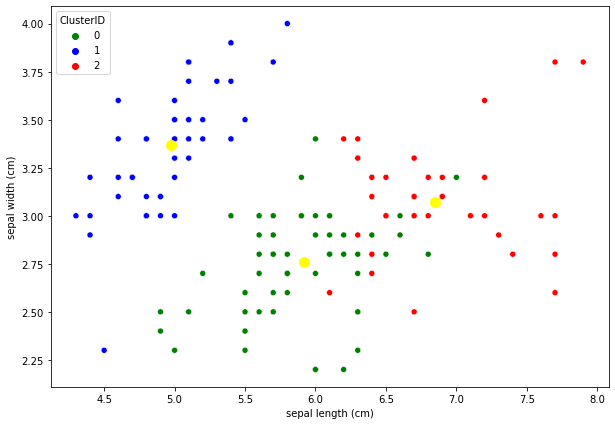

In [37]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID', 
                palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.show()